------------------------------------------
## import libraries

In [53]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [54]:
data = pd.read_csv('C:/Users/hp/Documents/AI/water_potability.csv')

In [55]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [56]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

-----------------------------------------
## EDA

the correllation Before handelling the null values

<Axes: >

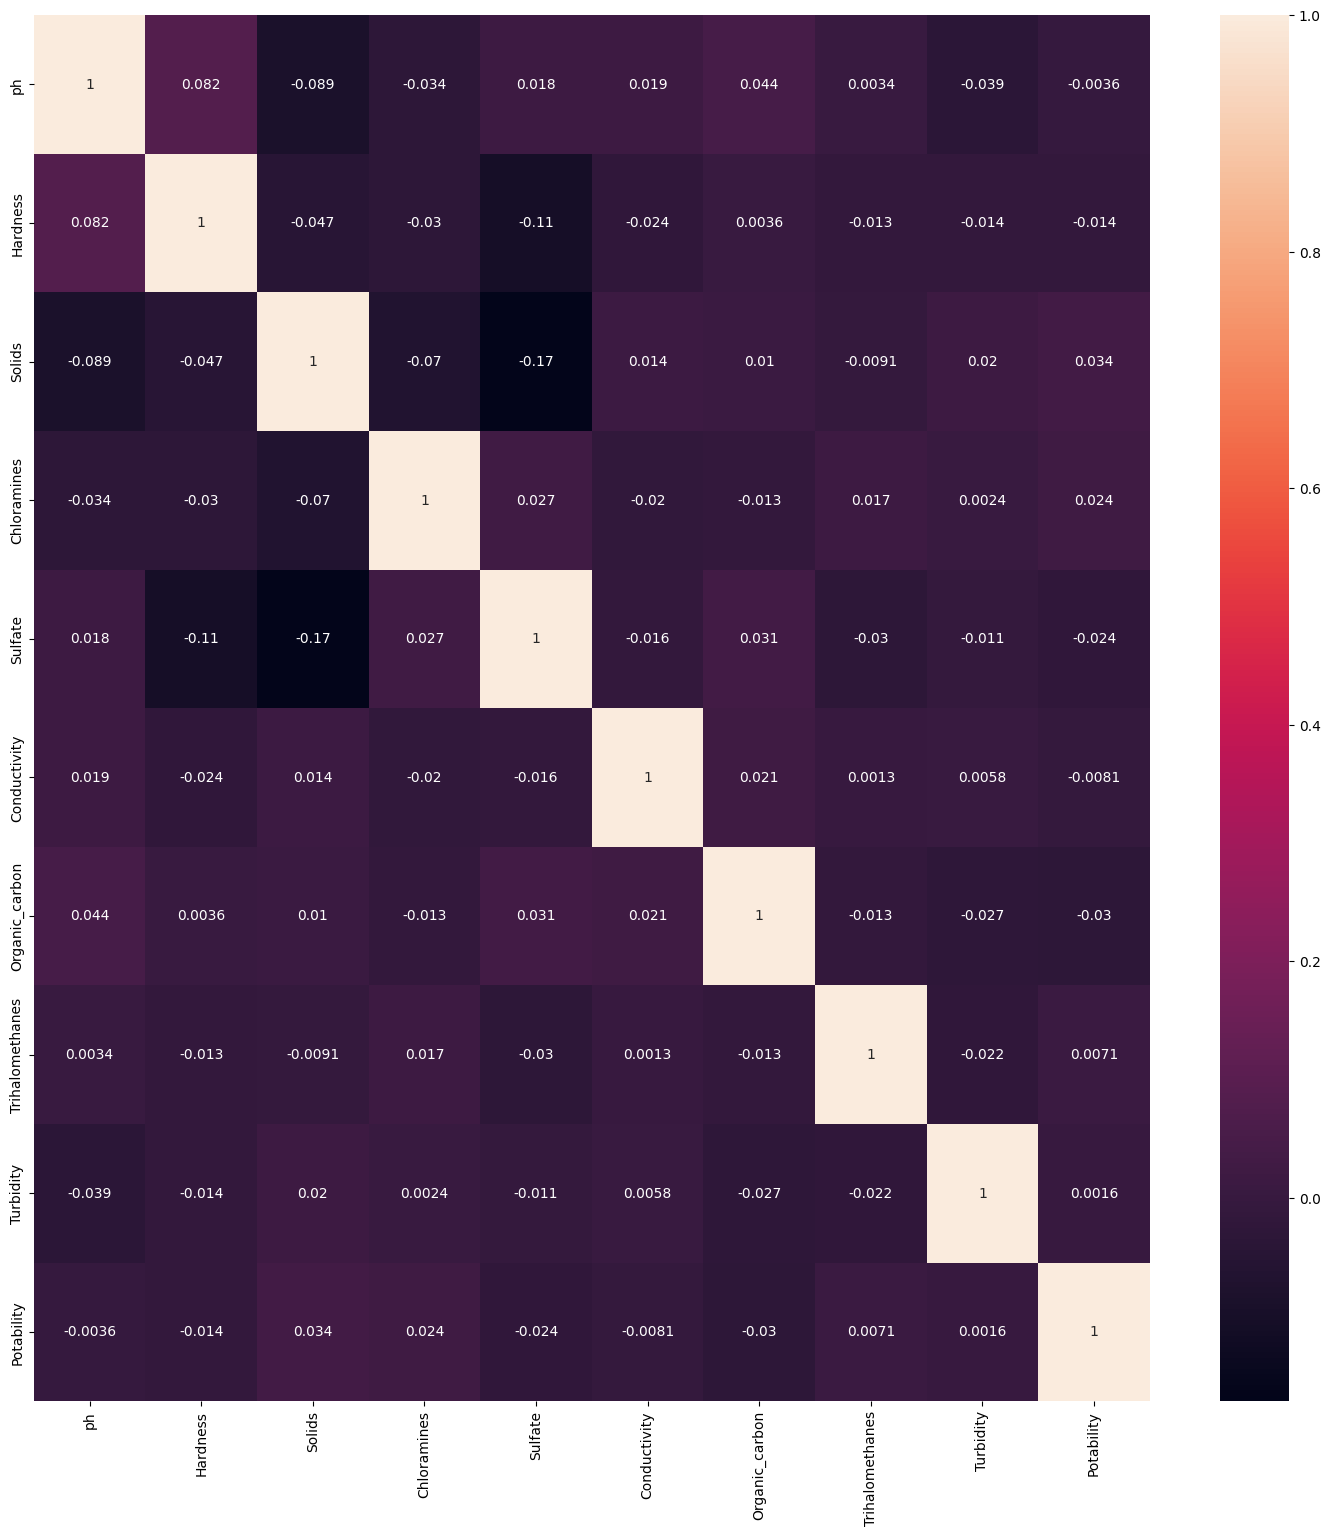

In [57]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), ax = ax, annot = True)

<Axes: >

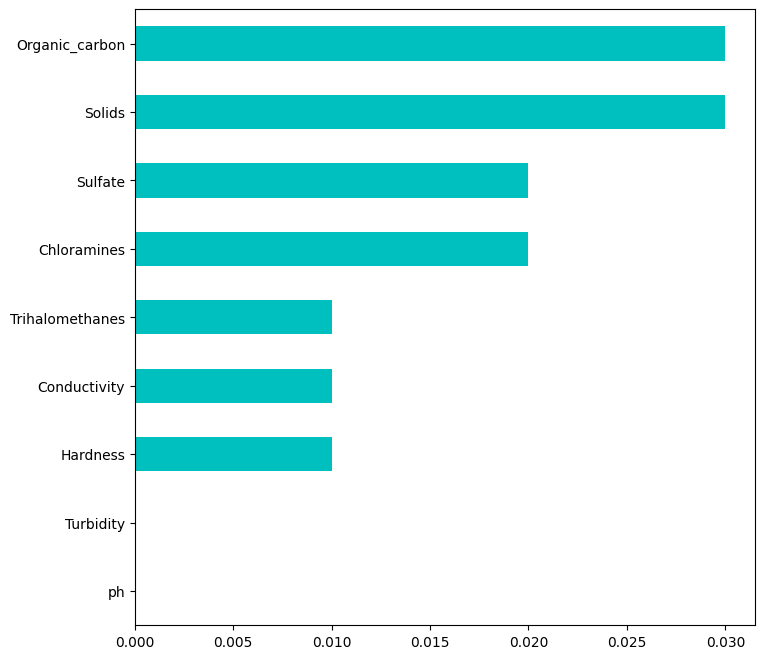

In [58]:
fig,ax = plt.subplots(figsize=(8,8))
abs(data.corr().round(2)['Potability']).sort_values()[:-1].plot.barh(color='c')

In [59]:
data[data['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [60]:
data[data['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [61]:
data['ph'].fillna(value=data['ph'].median(),inplace=True)
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median(),inplace=True)
data = data.dropna()

C:\Users\hp\AppData\Local\Temp\ipykernel_9828\3529164466.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hp\AppData\Local\Temp\ipykernel_9828\3529164466.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [62]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [63]:
data.shape

(2495, 10)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2495 non-null   float64
 1   Hardness         2495 non-null   float64
 2   Solids           2495 non-null   float64
 3   Chloramines      2495 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     2495 non-null   float64
 6   Organic_carbon   2495 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2495 non-null   float64
 9   Potability       2495 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 214.4 KB


the correllation After handelling the null values

<Axes: >

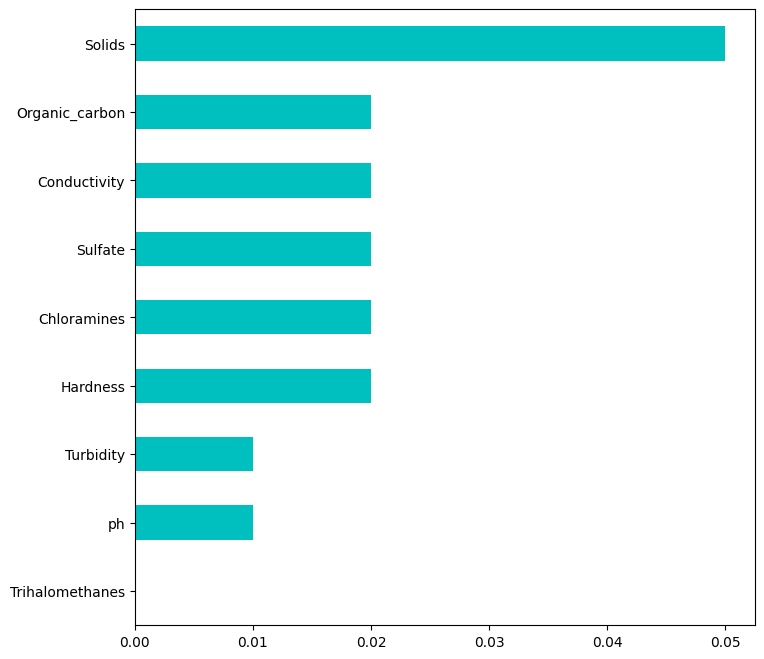

In [65]:
fig,ax = plt.subplots(figsize=(8,8))
abs(data.corr().round(2)['Potability']).sort_values()[:-1].plot.barh(color='c')

<Axes: >

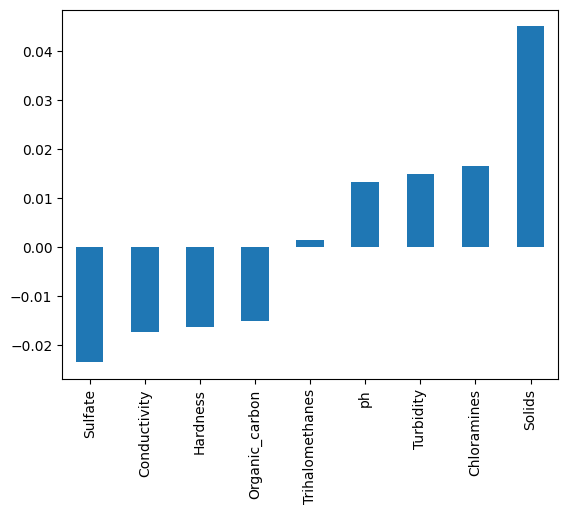

In [66]:
data.corr()['Potability'][:-1].sort_values().plot(kind='bar')

In [67]:
trace = go.Pie(labels = ['Potable', 'Not Potable'], values = data['Potability'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Drinkable Water')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

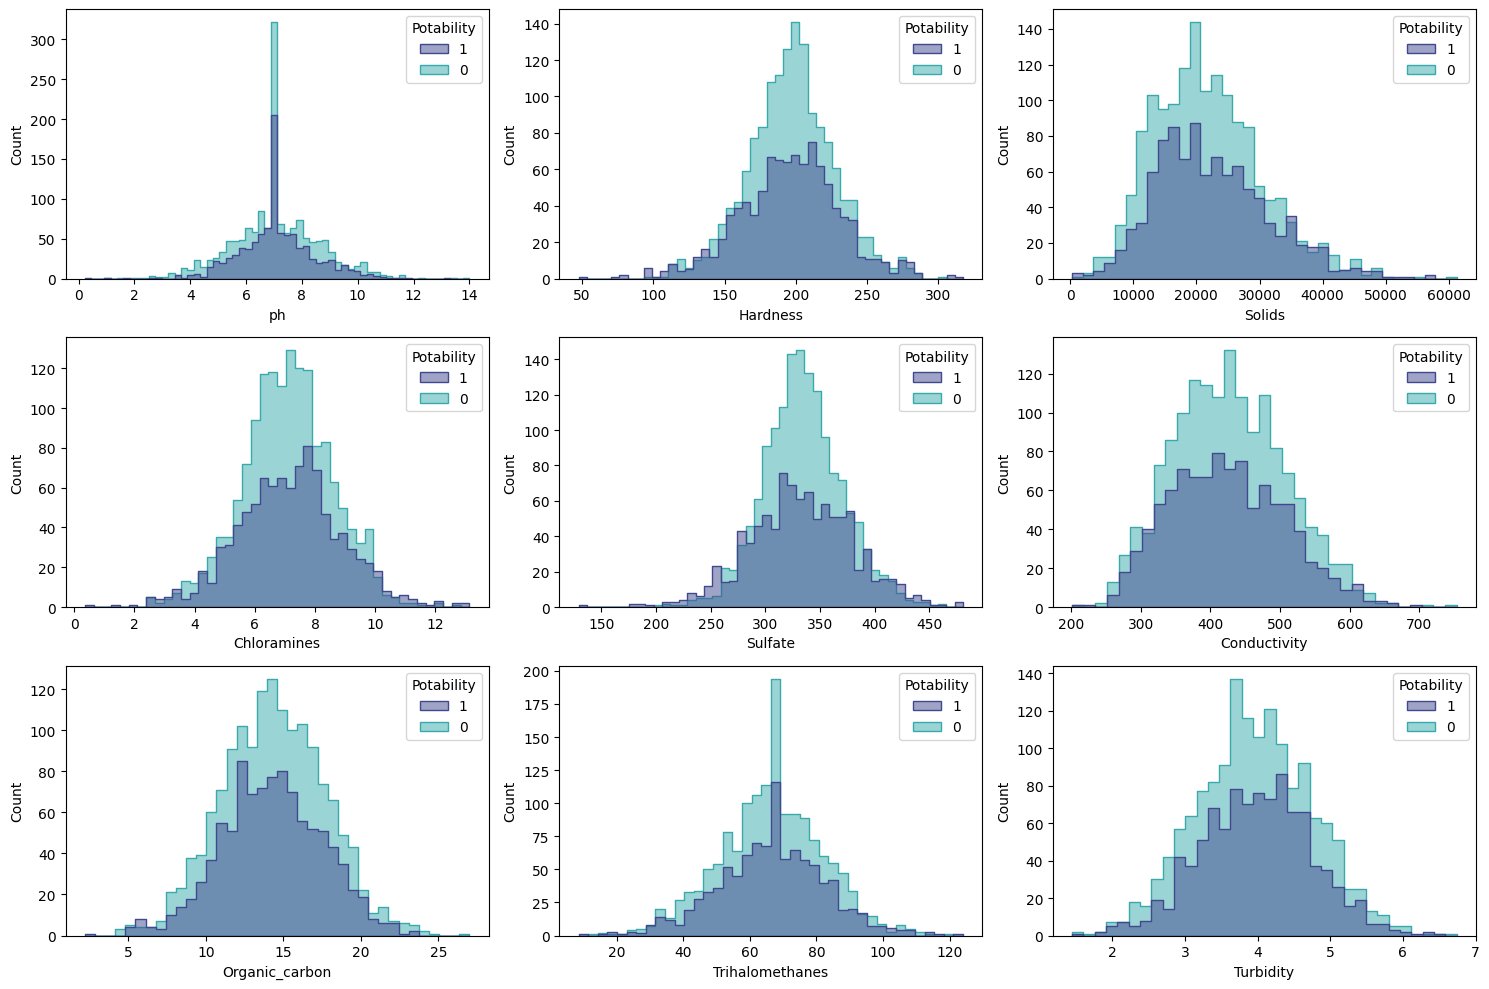

In [68]:
plt.figure(figsize = (15,10), tight_layout = True)

for i, feature in enumerate(data.columns):
    if feature != 'Potability':

        plt.subplot(3,3,i+1)
        sns.histplot(data = data, x =feature, palette = 'mako', hue = 'Potability',alpha = 0.5, element="step",hue_order=[1,0] )

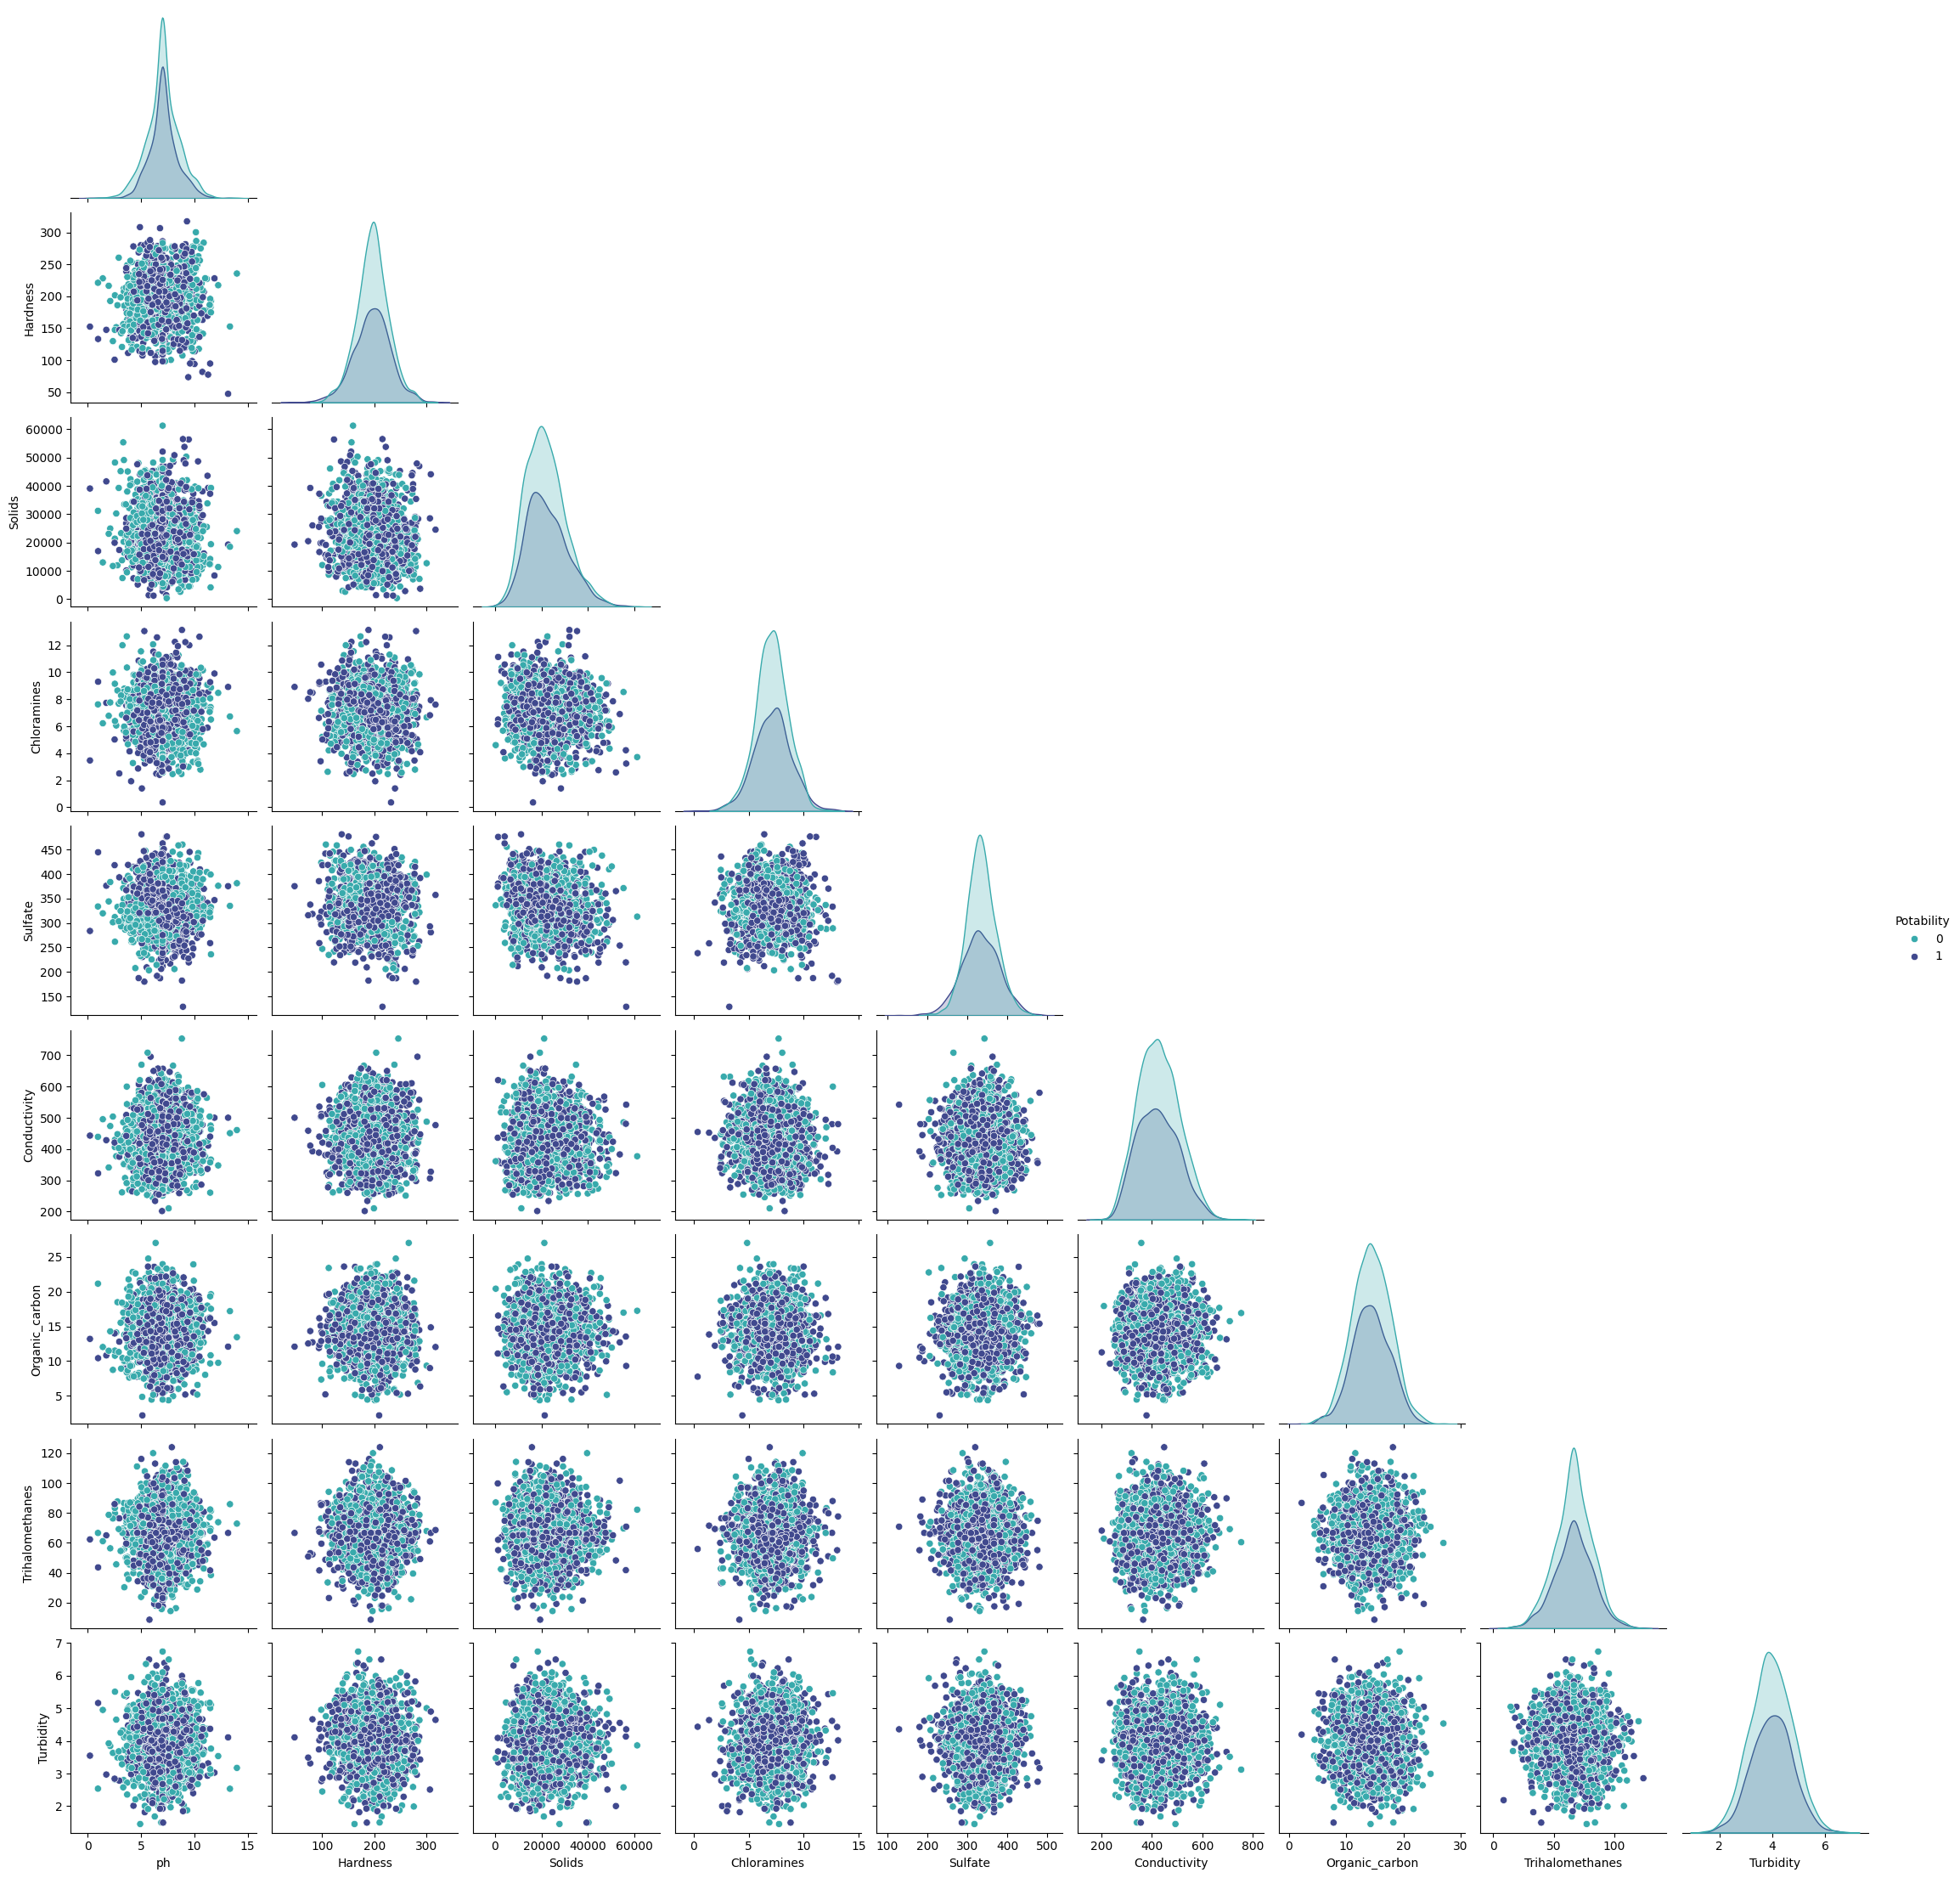

In [69]:
sns.pairplot(data = data,hue = 'Potability',palette='mako_r', corner=True)

-----------------------------------------
## Data Splitting

In [70]:
X = data.drop('Potability',axis=1).values
y = data['Potability'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

-----------------------------
## Data Scalling

In [72]:
scaler = MinMaxScaler()


In [73]:
scaler.fit(X_train)

MinMaxScaler()

In [74]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
print('training shape : ',X_train.shape)
print('testing shape : ',X_test.shape)

training shape :  (1746, 9)
testing shape :  (749, 9)


------------------------------
## Modelling

In [76]:
model = Sequential() # Initialising the ANN

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [77]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/300


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6921 - val_loss: 0.6887
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6878 - val_loss: 0.6836
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6840 - val_loss: 0.6758
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6764 - val_loss: 0.6691
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6697 - val_loss: 0.6688
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6834 - val_loss: 0.6687
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6632 - val_loss: 0.6686
Epoch 8/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6709 - val_loss: 0.6687
Epoch 9/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6674 - val_loss: 0.6686
Epoch 10/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6715 - val_loss: 0.6687
Epoch 11/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6710 - val_loss: 0.6686
Epoch 12/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6655 - val_lo

In [78]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

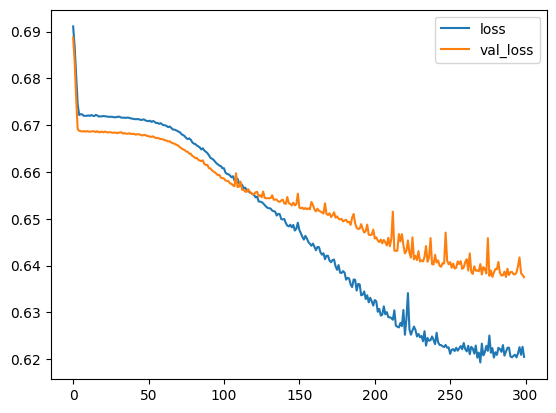

In [79]:
model_loss.plot()

In [80]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

 1/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75       457
           1       0.59      0.33      0.42       292

    accuracy                           0.65       749
   macro avg       0.63      0.59      0.58       749
weighted avg       0.63      0.65      0.62       749



In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[390  67]
 [197  95]]
Accuracy: 64.75300400534046%


In [84]:
model = Sequential()
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [85]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=900,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/900


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7090 - val_loss: 0.6710
Epoch 2/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6687 - val_loss: 0.6658
Epoch 3/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6812 - val_loss: 0.6652
Epoch 4/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6715 - val_loss: 0.6656
Epoch 5/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6648 - val_loss: 0.6637
Epoch 6/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6682 - val_loss: 0.6621
Epoch 7/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6703 - val_loss: 0.6603
Epoch 8/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6621 - val_loss: 0.6581
Epoch 9/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6613 - val_loss: 0.6569
Epoch 10/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6614 - val_loss: 0.6555
Epoch 11/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6708 - val_loss: 0.6544
Epoch 12/900
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6666 - val_lo

<Axes: >

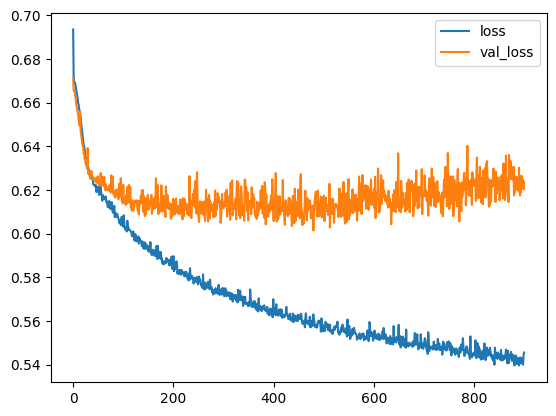

In [86]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [87]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       457
           1       0.60      0.46      0.52       292

    accuracy                           0.67       749
   macro avg       0.65      0.63      0.63       749
weighted avg       0.66      0.67      0.66       749



In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[368  89]
 [159 133]]
Accuracy: 66.88918558077437%


In [90]:
model = Sequential()
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=6,activation='tanh'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1,activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/500


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6.4653 - val_loss: 6.2837
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2746 - val_loss: 6.2837
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5171 - val_loss: 6.2837
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4099 - val_loss: 6.2837
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4244 - val_loss: 6.2837
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7387 - val_loss: 6.2837
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2740 - val_loss: 6.2837
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3477 - val_loss: 6.2837
Epoch 9/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5327 - val_loss: 6.2837
Epoch 10/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5547 - val_loss: 6.2837
Epoch 11/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3434 - val_loss: 6.2837
Epoch 12/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2438 - val_lo

<Axes: >

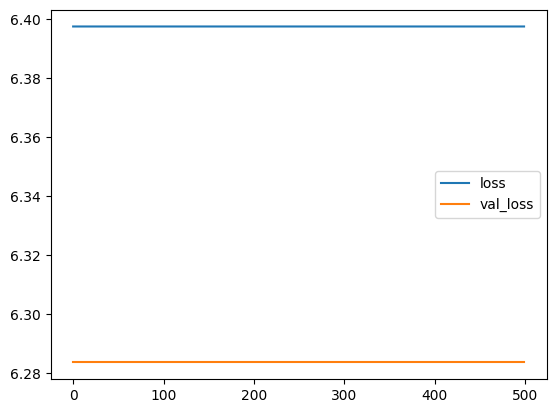

In [92]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [93]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       457
           1       0.00      0.00      0.00       292

    accuracy                           0.61       749
   macro avg       0.31      0.50      0.38       749
weighted avg       0.37      0.61      0.46       749



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[457   0]
 [292   0]]
Accuracy: 61.01468624833111%


In [106]:
# Input data
input_data = np.array([9.73956194896991, 166.94886404872258, 13623.160062865045, 7.23592175948416, 385.05913433199646, 369.59128906677967, 12.32260382095626, 68.50585164506361, 2.568079876725237])

# Reshape input data
input_data_reshape = input_data.reshape(1, -1)

# Load scaler
scaler = MinMaxScaler()
# Assuming you have loaded or defined your scaler previously with X_train

# Transform input data using the same scaler
std_data = scaler.fit_transform(input_data_reshape)  # Use fit_transform for new data
print("Scaled input data:", std_data)


# Predict using the loaded model
prediction = model.predict(std_data)
print("Prediction:", prediction)

# Interpret prediction
if prediction[0][0] < 0.5:
    print('Air Tidak dapat Diminum')
else:
    print('Air Dapat Diminum')

Scaled input data: [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: [[0.]]
Air Tidak dapat Diminum


In [107]:
import pickle

In [108]:
filename = 'water_quality_model.sav'
pickle.dump(model, open(filename, 'wb'))